[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 9.23

Bootstrap percentile confidence intervals for the correlation coefficient between height and foot length in a population in a scenario where we know the true population correlation coefficient\
Topics: The bootstrap, bootstrap percentile confidence intervals

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from scipy.stats import gaussian_kde
from numpy.random import default_rng
import seaborn as sns
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font', family='serif', serif='cm10')

matplotlib.rc('text', usetex=True)
import matplotlib.transforms

alldata = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

font_size = 15
font_size_legend = 15
font_size_ticks = 15

stature = alldata['stature'] / 10.
foot = alldata['footlength']/10.

stature_min = stature.min()
stature_max = stature.max()
foot_min = foot.min()
foot_max = foot.max()

data = np.stack((stature,foot))

rho_pop = np.corrcoef(data)[0,1]
print("Population correlation coefficient: " + str(rho_pop))

Population correlation coefficient: 0.718083551334714


In [2]:
n = 25

rng = default_rng(1234)
tries = int(1e6)# Takes a while, change to 1e5 to make it faster

sample_rhos = np.zeros(tries)
for ind_tries in range(tries):
    indices = rng.choice(data.shape[1],n,replace=True)
    sample_rhos[ind_tries] = np.corrcoef(data[:,indices])[0,1]

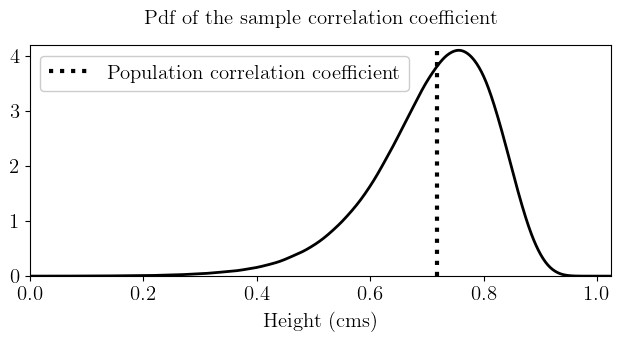

In [7]:
x_min = 0
x_max = 1.025
x = np.linspace(x_min,x_max,500)
y_max = 4.2
eps = 1e-3
x = np.linspace(x_min, x_max, 1000)

fig = plt.figure(figsize=(7.5,3))
pdf = gaussian_kde(sample_rhos,bw_method=0.1)
plt.plot(x,pdf(x),lw=2,color="black")
plt.vlines(rho_pop, 0,y_max,lw=3,ls="dotted",color="black",label="Population correlation coefficient")
[l,u] = np.percentile(sample_rhos,[2.5, 97.5])
x_aux = x[x>l]
x_aux = x_aux[x_aux<u]
plt.ylim([0,y_max])
plt.xlim([x_min,x_max])
plt.yticks([0,1,2,3,4],fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks)
ax = plt.gca()
plt.title(r"Pdf of the sample correlation coefficient",fontsize=font_size,pad=15)
plt.xlabel(r"Height (cms)",fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size_legend,framealpha=1);

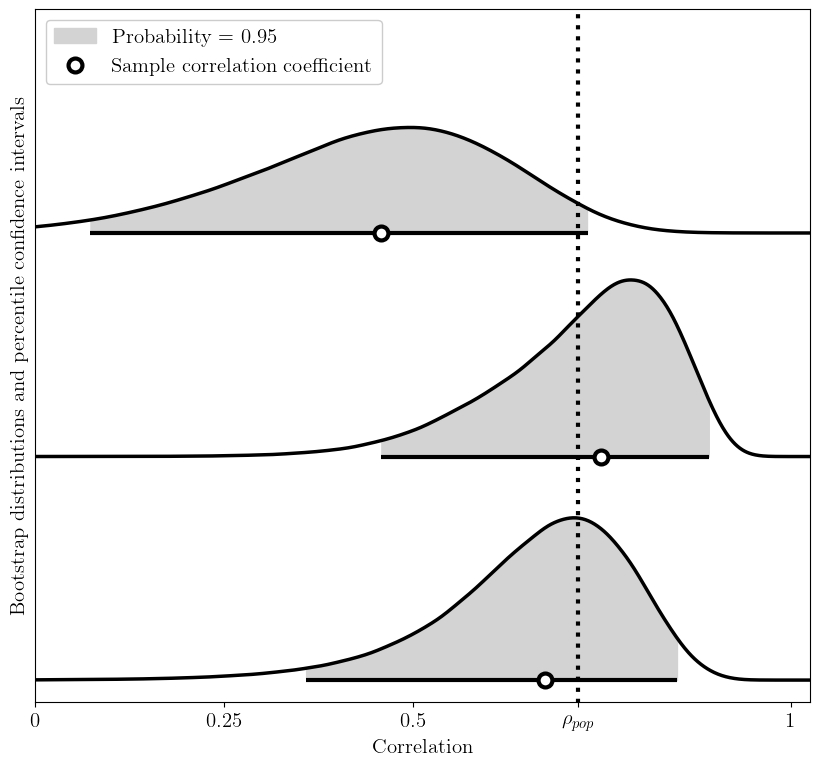

In [10]:
rng = default_rng(1234567)
step = 5

n_bs = int(1e6)
tries = 3

plt.figure(figsize=(10,9))
plt.xticks([0,0.25,0.5,rho_pop,1],[0,0.25,0.5,r"$\rho_{pop}$",1],fontsize=font_size)
plt.yticks([]) 
plt.vlines(rho_pop, -1,tries * step,lw=3,ls="dotted",color="black")
plt.xlim(x_min,x_max)
plt.ylim(-0.5,3 * step)
plt.ylabel(r"Bootstrap distributions and percentile confidence intervals",fontsize=font_size,labelpad=5)
plt.xlabel('Correlation',fontsize=font_size,labelpad=5)
for ind in range(tries):
    indices = rng.choice(data.shape[1],n,replace=True)
    sample_rho = np.corrcoef(data[:,indices])[0,1]
    sample_rho_bs = np.zeros(n_bs)
    for ind_bs in range(n_bs):
        indices_bs = rng.choice(indices,n,replace=True)
        sample_rho_bs[ind_bs] = np.corrcoef(data[:,indices_bs])[0,1]
    pdf_bs = gaussian_kde(sample_rho_bs,bw_method=0.1)
    plt.plot(x,ind * step + pdf_bs(x),lw=2.5,color="black")

    [l,u] = np.percentile(sample_rho_bs,[2.5, 97.5])
    x_aux = x[x>l]
    x_aux = x_aux[x_aux<u]
    if ind == 0:
        plt.fill_between(x=x_aux,y1=ind * step,y2=ind * step + pdf_bs(x_aux),color="lightgray",label="Probability = 0.95")
    else:
        plt.fill_between(x=x_aux,y1=ind * step,y2=ind * step + pdf_bs(x_aux),color="lightgray")
    if u < rho_pop or l > rho_pop:
        plt.hlines(ind * step,l,u,lw=3,color="black",ls="dashed")
    else:
        plt.hlines(ind * step,l,u,lw=3,color="black")
    if ind == 0:
        plt.plot(sample_rho,ind * step,"o",markersize=10,markeredgewidth=3,markerfacecolor = "white",
                 markeredgecolor = "black",label="Sample correlation coefficient")
    else:
        plt.plot(sample_rho,ind * step,"o",markersize=10,markeredgewidth=3,markerfacecolor = "white",
                 markeredgecolor = "black")
plt.legend(fontsize=font_size_legend,loc="upper left",framealpha=1)